## Testando modelos clássicos: Média Móvel

### Carregando o dataframe:

In [1]:
import utils
pd, np, plt, go, seasonal_decompose, MinMaxScaler, mean_squared_error, train_test_split, warnings, stats = utils.import_libraries()
df = utils.preparing_df()
%matplotlib inline 

In [2]:
df.head()

,y
ds,
2004-01-02,22.445
2004-01-05,23.532
2004-01-06,23.576
2004-01-07,23.320
2004-01-08,23.717


### Vamos utilizar as médias de 10, 20, 100 e 200 dias.

In [3]:
df['MA10'] = df['y'].rolling(10).mean().shift()
df['MA20'] = df['y'].rolling(20).mean().shift()
df['MA100'] = df['y'].rolling(100).mean().shift()
df['MA200'] = df['y'].rolling(200).mean().shift()

In [4]:
df

,y,MA10,MA20,MA100,MA200
ds,,,,,
2004-01-02,22.445,NaN,NaN,NaN,NaN
2004-01-05,23.532,NaN,NaN,NaN,NaN
2004-01-06,23.576,NaN,NaN,NaN,NaN
2004-01-07,23.320,NaN,NaN,NaN,NaN
2004-01-08,23.717,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-01-03,132.834,132.3480,129.88620,120.18750,115.639360
2024-01-04,131.226,132.6117,130.11865,120.32204,115.788870
2024-01-05,132.023,132.6259,130.33980,120.44340,115.931625


In [5]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['y'], name='y'))
fig.add_trace(go.Scatter(x=df.index, y=df['MA10'], name='MA10'))
fig.add_trace(go.Scatter(x=df.index, y=df['MA20'], name='MA20'))
fig.add_trace(go.Scatter(x=df.index, y=df['MA100'], name='MA100'))
fig.add_trace(go.Scatter(x=df.index, y=df['MA200'], name='MA200'))
fig.show()

### Visualizando os dados mais recentes: último ano ou 260 dias de operações.

In [6]:
limit = 260
df_limit = df.iloc[-limit:]
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_limit.index, y=df_limit['y'], name='y'))
fig.add_trace(go.Scatter(x=df_limit.index, y=df_limit['MA10'], name='MA10'))
fig.add_trace(go.Scatter(x=df_limit.index, y=df_limit['MA20'], name='MA20'))
fig.show()

### Prevendo os "N" dias com base na média móvel aritmética

In [7]:
df['MA10Forward10'] = np.NaN

In [8]:
def make_window(window_size, start_point):
    return [start_point+x for x in range(window_size)]

In [9]:
window_size = 10
forward_days = 10

for index in range(window_size, len(df), forward_days):
    for i in range(0, forward_days):
        if index + i >= len(df):
            break

        window_close = make_window(window_size -i, index +i -window_size)
        window_MA = make_window(i, index)
        mean = pd.concat([df['y'].iloc[window_close], df['MA10Forward10'].iloc[window_MA]]).mean(axis=0)

        df.iat[index + i, df.columns.get_loc('MA10Forward10')] = mean

#### Plotando os dados:

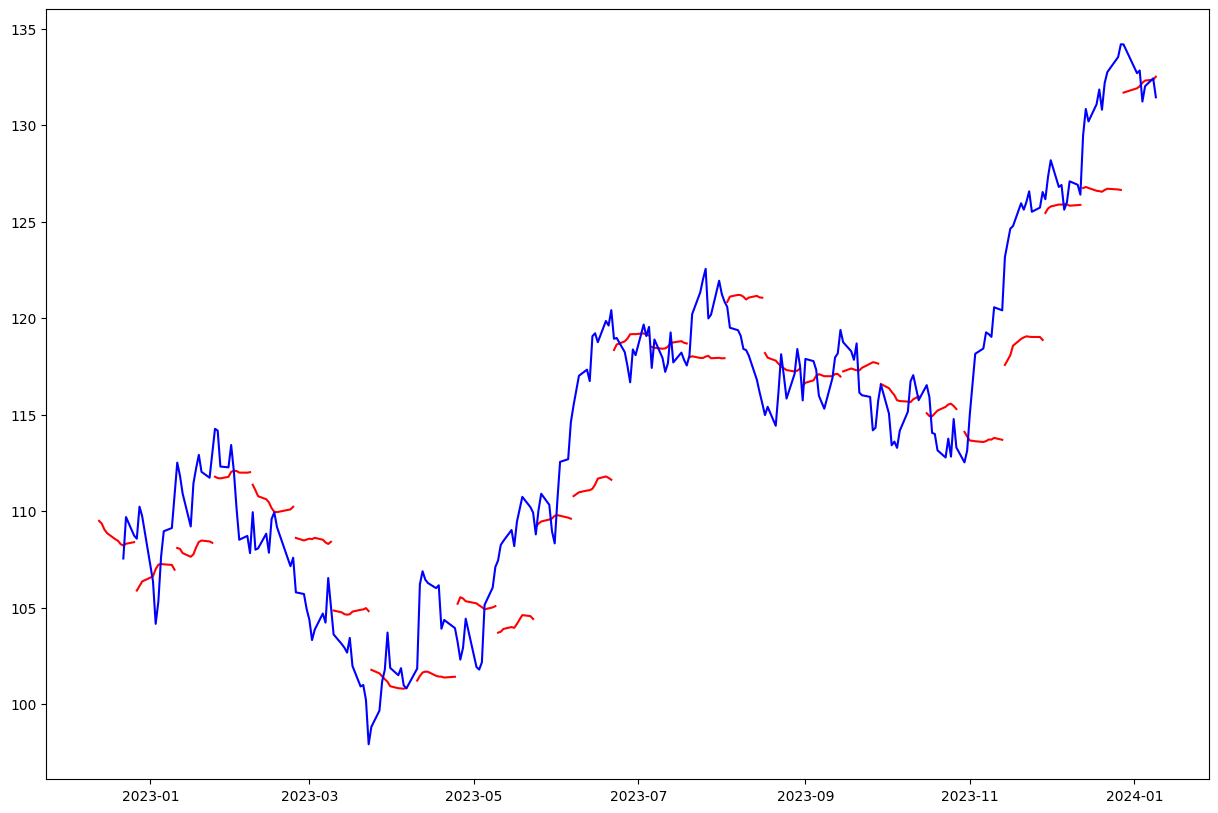

In [10]:
plt.figure(figsize = (15,10))

size = len(df)-limit - (len(df)-limit)%forward_days

for index in range(size, len(df), forward_days):
    plt.plot(df['MA10Forward10'][index:index+forward_days], color='r')

plt.plot(df['y'][-limit:], color='b', label='Close')
plt.show()

## Conclusão:
### Esse algorítmo simples falhou completamente na previsão.